In [1]:
%%javascript
function toggler(){
    if(window.already_toggling){
        // Don't add multiple buttons.
        return 0
    }
    let btn = $('.input').append('<button>Toggle Code</button>')
        .children('button');
    btn.on('click', function(e){
        let tgt = e.currentTarget;
        $(tgt).parent().children('.inner_cell').toggle()
    })
    window.already_toggling = true;
}
// Since javascript cells are executed as soon as we load
// the notebook (if it's trusted), and this cell might be at the
// top of the notebook (so is executed first), we need to
// allow time for all of the other code cells to load before
// running. Let's give it 5 seconds.

setTimeout(toggler, 5000);

<IPython.core.display.Javascript object>

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, TruncatedSVD
import seaborn as sns
import utils
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = utils.get_data()

b'Skipping line 784648: expected 15 fields, saw 22\n'
b'Skipping line 1173831: expected 15 fields, saw 22\n'
b'Skipping line 1470689: expected 15 fields, saw 22\n'


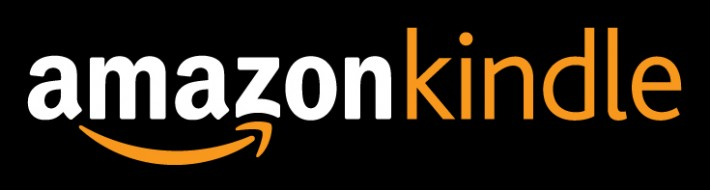

In [5]:
display.Image("amazon_logo.jpg")

# Amazon Kindle: Analyzing Customer Sentiments on E-book Purchases

# Executive Summary

E-books were invented in the early 1970's by Michael S. Hart. Michael created his first electronic document by typing the United States Declaration of Independence into a computer in plain text.[[1]](https://en.wikipedia.org/wiki/Ebook) It wasn't until the late 1990s when E-books became mainstream where people were able to access documents through a primitive type of handheld device called the Personal Digital Assistant (PDA). Although at this time E-books weren't completely solidified yet as a primary source of information consumption until the Sony Corporation released an e-reading device in 2006 and Amazon.com released the Kindle in 2007, after which sales of e-books in the United States grew rapidly.[[2]](https://www.britannica.com/technology/e-book)

The growth of E-book use continued to spike upward especially after the release of the iPhone in 2007 and the very first Android phone in 2008. As the years went by smartphone and tablet technologies started to become more powerful and more affordable in the year 2010s this has seen a strong boost in sales of E-books especially from Amazon's kindle store where people no longer needed special devices to access E-book file systems. 

Today E-books haven't completely replaced print materials just yet, as a matter of fact 72% of adults still prefer print books over E-books. Although it cannot be denied that the use of E-books will now be a common choice among select groups of people as years continue to pass and that E-Books and Print Books will continue to co-exist in the years to come.[[3]](https://www.tonerbuzz.com/blog/paper-books-vs-ebooks-statistics/)

A good number of people still seem to prefer text media over film or other forms of media. Interestingly, many highly-rated movies are based on books. [[4]](https://www.bookbub.com/blog/best-movies-based-on-books-all-time) The researchers have deemed it fit to dive deeper on the certain factors that make e-books salable and which e-books are given more attention based on sales and ratings. The common sentiments of the reviews were also explored to be able to gain more insights as to which are the common words that are attributed to excellently performing e-books or poorly rated ones. Additionally, topic modeling was implemented  to customers' reviews, to show their benefits practically in detecting important topics or issues written by readers. The findings may give ideas to authors or publishers on how to improve their crafts or strategize better to increase sales and make readers happy.

# I. Introduction

With the growth of online platforms and applications, large amounts of textual user-generated content are created daily in the form of comments, reviews, and short-text messages. People are able to post their own content through various social media, such as forums, micro-blogs, or online social networking sites. Nowadays, social media sites release their application programming interfaces (APIs), prompting data collection and analysis by researchers and developers. The challenge now is to discover useful information or more on the topic being discussed from such huge unstructured text data. Discovering common sentiments and topics are beneficial for various purposes such as for clustering documents, organizing online available content for information retrieval and recommendations.  

Natural language processing algorithms are used to analyze the massive amount of unstructured text data available online. Common techniques are Topic modeling and Sentiment analysis. They are frequently used as text-mining tool for discovery of hidden semantic structures in a text body. Sentiment analysis can determine the emotional tone behind a series of words that will help business owners and researchers gain an understanding of the the attitudes, opinions and emotions expressed within an online mention. Furthermore, Topic modeling automatically discover the hidden themes from given documents which adds business value.

This paper covers sentiment analysis and basic topic modeling and its implementation to e-book customers' reviews. The researchers aim to contribute to the systematic identification of product opportunities and improvements from large-scale customer-generated reviews and may be used as monitoring tool for changing customer needs analysis in rapidly evolving product environments.

# II. Motivation & Problem Statement

## II.I Motivation

E-books are the most accesible type of information format and has a more robust sales tracking methodology due to the Amazon kindle store format. It is also much easier to acquire compared to print books especially for customers outside the US. The researchers aim to analyze the sentiments of customers purchasing E-books and to be able to infer insights regarding these purchases.

## II.II Problem Statement

**1. Considering the motivation above, what are the common features of the highly rated e-books?**

   The researchers are interested in finding out what makes certain books reach the top end of the charts and what kind of  books are given film adaptations based on certain factors.

**2. What are the common sentiments of customers on their purchases?**
    
   The researchers wants to identify common emotions or "sentiments" from the given star-ratings.
    

**3. What are the topics or issues usually mentioned in the reviews?**
 
   The researchers are also interested on the issues or topics conveyed by the customers through their reviews. This could potentially help authors/publishers to improve or corroborate certain strategies on writing or publishing their books/e-books.

# III. Methodology



						  Methodology Pipeline


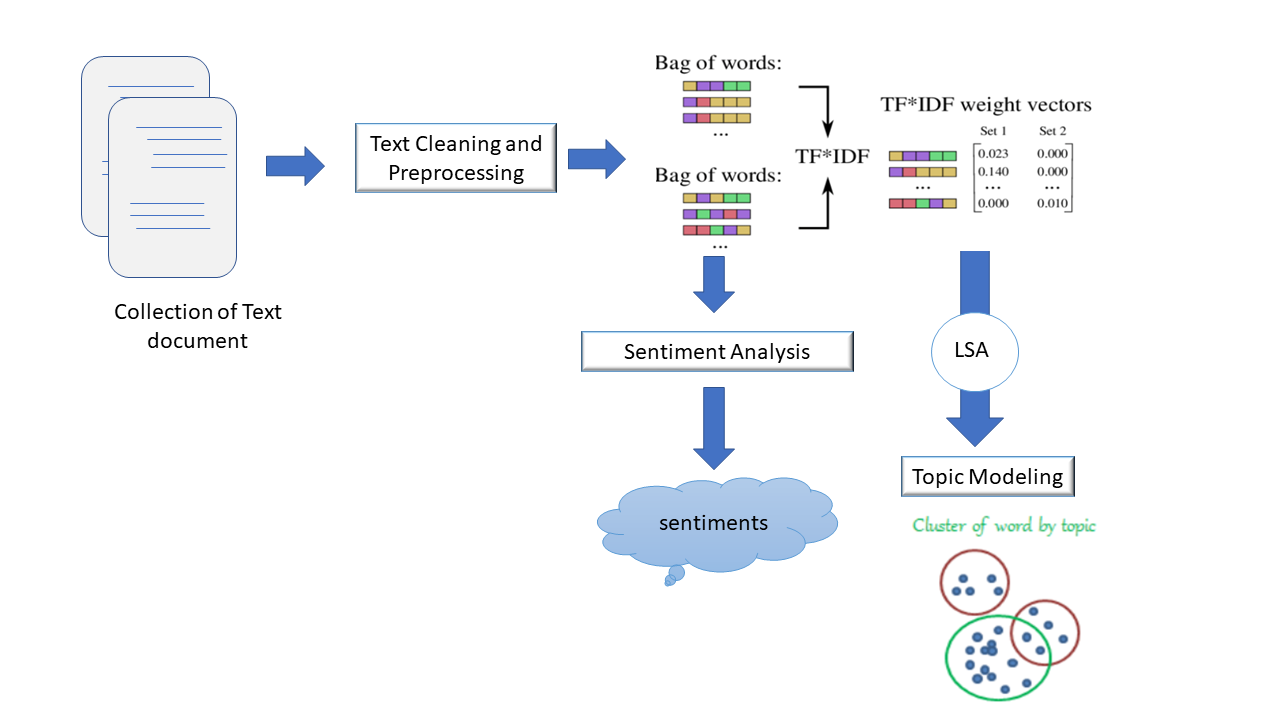

In [6]:
print('\t\t\t\t\t\t  Methodology Pipeline')
display.Image("pipeline.PNG")

## III.I Text Cleaning and Preprocessing

Before the model can understand and interpret human language, a lot of pre-processing goes behind the scenes. The data to be analyzed are text reviews of customers of Amazon E-book. Text data are usually messy. To prepare the data for sentiment analysis and topic modeling, data is cleaned using the pipeline below:

1. **Converting Accented Characters.**
Accented characters are important elements which are used to signify emphasis on a particular word during pronunciation or understanding. Words such as résumé, café, prótest, divorcé, coördinate, exposé, latté, are just few examples. However, in this project, all accented characters are converted to its usual form. he researhers include this method to make sure characters which look identical actually are identical. The researchers converted and standardized the text into ASCII characters. A simple example — converting é to e and résumé to resume.

2. **Removing punctuation, numbers and special characters.**
Special characters are non-alphanumeric characters. These characters are commonly found in reviews, social media posts, and comments. These characters add no value to text-understanding and induce noise into algorithms. The researchers used regular-expressions (regex) to get rid of these characters and numbers.

3. **Removing stopwords.**
One of the major forms of pre-processing is to filter out useless data. In natural language processing, useless words (data), are referred to as stopwords. A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that is usually ignored in the analysis. The researchers used the nltk stopwords package to filter and remove the stopwords.

4. **Converting text to its base form or root form (Lemmatization).**
Through lemmatization, the texts are derived to their word stem, base or root form. For example, "eating" is converted to its base form "eat."

5. **Removing extra whitespaces and tabs.**
The researchers also removed extra whitespaces and tabs do not add any information to text processing. 

6. **Converting to lowercase.**
The researchers also converted the characters or text into lowercase. It can be achieved by using lower function.

## III.II. Data Visualization and Exploration

The researchers then performed exploratory data analysis (EDA) on the raw data set to be able to detect outliers, trivial features and gain insights regarding the distribution of the whole data set. The researchers also checked the number of NaNs in the overall dataset. 

Since the researchers are interested in finding out what makes certain books reach the top end of the charts, they performed data visualizations to check the distributions of rating for all the e-books. They also checked what are the Top 10 e-books with high stars rating and made inferences.
 

## III.III Sentiment Analysis

Sentiment basically refers to the contextual polarity of a text or a document, meaning, the emotional effect the text or document has on the reader (or the author wants to convey). It can also indicate how a certain person or group reacts to a specific topic. In this section, the researchers want to investigate on the sentiments conveyed by the customers on their E-book purchase. Sentiment analysis is the use of natural language processing, text analysis, and computational linguistics to systematically identify, extract, quantify, and study affective states and subjective information.[[13]](https://en.wikipedia.org/wiki/Sentiment_analysis)

In the study, **corpus** refers to a group of similar media. This could be a group of texts like articles, images like aerial photos or portraits, audio like songs, or youtube videos — anything that can be conceptualized as the addition of parts. On the other hand, **document** refers to one text, photo, song, or video. A **term** is a word.

Positive words/sentences have a positive sentiment attached to them. For example, when some text indicates happiness, enthusiasm, or kindness, they're generally classified as having a positive sentiment. Similarly, negative sentences have a negative sentiment attached to them. For example, when some text indicates sadness, hate, violence, discrimination etc., they're generally classified as having a negative sentiment. When no emotions are implied, they're classified as neutral.

Since the researhers were interested in the common sentiments of the customers on their e-book purchases, they performed sentiment analysis and used visualization like WordCloud from the wordcloud package.

### Sentiment Polarity using Star Rating and AFINN

Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration. Typically, sentiments are quantified using polarity.

Two methods were perfomed in analyzing the sentiments of customers from text reviews. 
1. **Star Rating.**
The first method used the star rating given by the customers. Reviews were divided into 3 sentiments: positive, negative and neutral. All the reviews with star rating of 4-5 have a polarity score of 1. They are considered to have positive sentiments. All reviews with star rating of 3 have a polarity score 0 and considered to be neutral. On the otherhand, negative sentiments are reviews with star ratings 1-2 with polarity score -1.

2. **AFINN.**
AFINN has a function for scoring the sentiment of a text. It is developed by Finn Årup Nielsen. It contains 3300+ words with a polarity score associated with each word. The AFINN lexicon assigns words with a score that runs between -5 and 5, with negative scores indicating negative sentiment and positive scores indicating positive sentiment. In python, there is an in-built function for this lexicon. How the model assigns the polarity score can be illustrated below.

| Word    | Polarity | Sentiment |
|---------|----------|-----------|
| funny   | 4        | Positive  |
| lovable | 3        | Positive  |
| lose    | -3       | Negative  |
| problem | -2       | Negative  |
| young   | 0        | Neutral   |



## III.IV Topic Modeling


Topic Modeling falls under unsupervised machine learning where the documents are processed to obtain the relative topics. 


Some of the well known approaches to perform topic modeling are:

1. **Latent Semantic Analysis (LSA).**
    LSA is one of the foundational techniques in topic modeling. The core idea is to take a matrix of what we have — documents and terms — and decompose it into a separate document-topic matrix and a topic-term matrix. It is an application of Singular Value Decomposition (SVD) technique.

    In the study, the researchers converted the copus to a sparse matrix of TF-IDF score (term frequency-inverse document frequency). Rows represent terms and columns represent documents. TF-IDF assigns a weight for term *j* in document *i* as follows:
    $$ w_{i,j} = tf_{i,j} \times \log(\frac{N}{df_i}) $$
    
     where:
     - $tf_{i,j}$ is the number of occurence of *i* in *j* 
     - $df_i$ is the number of documents containing *i*
     - $N$ the total documents

  LSA learns latent topics by performing a matrix decomposition on the document-term matrix using truncated SVD. LSA is typically used as a dimension reduction technique.[[14]](https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python) As for truncated SVD, we take k largest singular values (SV) (0<k<n, thus truncated) and their corresponding left and right singular vectors:
    $$ A_t ≈ U_{t} Σ V^{T}$$

    Matrix $A_t$ with shape m x n is constructed via truncated SVD is an approximation to the original $A$. $U, Σ, V$ provide a real-valued matrix factorization of A. $U$ is a m × k matrix with orthonormal columns, $U^tU= I_k$, where $I_k$ is the k × k identity matrix. $V$ is an orthonormal k × n matrix. $Σ$ is a k × k diagonal matrix, with the non-negative singular values, s1, s2, . . . , sk, on the diagonal


# IV. Data Source 

## IV.I Data Retrieval

**Data set**. Data used in the study is a set of product reviews collected from amazon.com. The data can be retrieved using the jupyter terminal (mnt/data/public/amazon-reviews/amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv.gz)
The first three rows of the dataset is shown below.

In [7]:
df[['product_title','review_headline', 'star_rating']].head(3)

product_title  \
0                                          Big Maria   
1  The Woman Who Wasn't There: The True Story of ...   
2                            Mary had A Sleepy Sheep   

              review_headline  star_rating  
0                      Quirky            4  
1  The Woman Who Wasn't There            4  
2    This Sleepy Sheep rocks!            5


## IV.II Data Cleaning

**Drop null**. The dataset contains more or less 5 million rows therefore the researchers decided to drop 216 rows containing null data points.

**Limit to year 2013**. The researchers chose to focus on reviews made in year 2013 since these were the years with the most amount of E-book purchases. Previous years were almost completely blank.

**Dropping trivial columns**. The researchers dropped columns that didn't contain any usable data. Only three columns were used in the section VI, namely `product_title`,`review_headline`, and `star_rating`.

**Random Undersampling of dataset**. In the sentiment analysis and topic modeling sections, the researchers reduced the dataset to be analyzed to 25,000 samples. This is due to limitation of computing power. The researchers decided to undersample and balance the data. The overall dataset is composed of reviews with 5,000 sample size for each star-rating.

# V. Data Exploration

## V.I Data types per feature

In [8]:
print('\nData Types per feature')
print()
df.info()


Data Types per feature

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5100209 entries, 0 to 5100424
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   marketplace        object        
 1   customer_id        int64         
 2   review_id          object        
 3   product_id         object        
 4   product_parent     int64         
 5   product_title      object        
 6   product_category   object        
 7   star_rating        int64         
 8   helpful_votes      float64       
 9   total_votes        float64       
 10  vine               object        
 11  verified_purchase  object        
 12  review_headline    object        
 13  review_body        object        
 14  review_date        datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 622.6+ MB


In [9]:
print('\nData Types per feature')
print()
df.info()


Data Types per feature

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5100209 entries, 0 to 5100424
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   marketplace        object        
 1   customer_id        int64         
 2   review_id          object        
 3   product_id         object        
 4   product_parent     int64         
 5   product_title      object        
 6   product_category   object        
 7   star_rating        int64         
 8   helpful_votes      float64       
 9   total_votes        float64       
 10  vine               object        
 11  verified_purchase  object        
 12  review_headline    object        
 13  review_body        object        
 14  review_date        datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 622.6+ MB


**Numerical Columns of interest**:

- star_rating
- helpful_votes
- total_votes

## V.II Descriptive Statistics for numerical columns

In [10]:
print('\nBasic statistics of the Relevant Amazon E-book reviews features')
df[['star_rating','helpful_votes','total_votes']].describe()


Basic statistics of the Relevant Amazon E-book reviews features


star_rating  helpful_votes   total_votes
count  5.100209e+06   5.100209e+06  5.100209e+06
mean   4.240892e+00   1.613032e+00  2.275919e+00
std    1.120672e+00   1.338733e+01  1.520255e+01
min    1.000000e+00   0.000000e+00  0.000000e+00
25%    4.000000e+00   0.000000e+00  0.000000e+00
50%    5.000000e+00   0.000000e+00  1.000000e+00
75%    5.000000e+00   1.000000e+00  2.000000e+00
max    5.000000e+00   1.842900e+04  1.936800e+04

All null data points and other trivial features containing one value are dropped. The researchers find the amount of null values (0.004%) is immaterial relative to the total number of data points in the data set.

## V.III Distribution per numerical feature

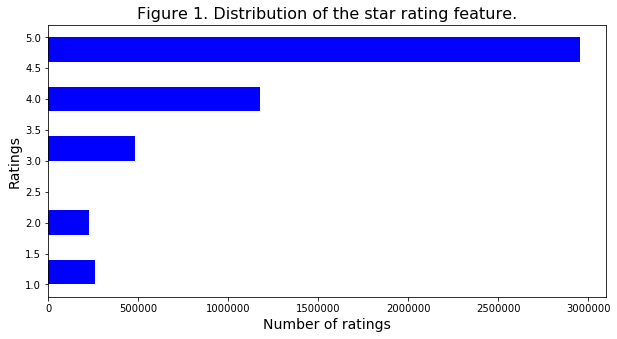

In [11]:
utils.stardist_plotter(df, f_num=1)

The data contains more 5 rated purchases which may be a sign that customers are either very forgiving or that the books in the Amazon kindle store are just higher quality books in general.

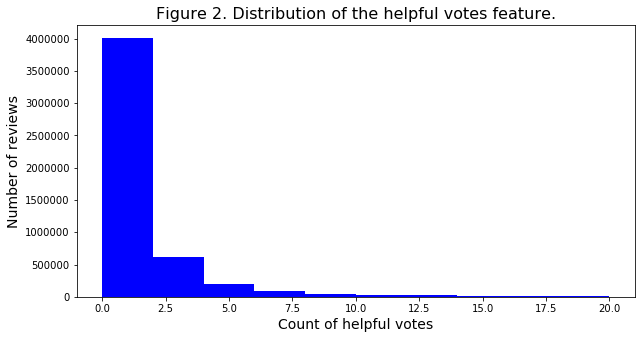

In [12]:
utils.helpful_votes_distplotter(df, f_num=2)

There are a lot of reviews that aren't really labeled as helpful which is understandable since some reviews might become burried as newer reviews come in. 

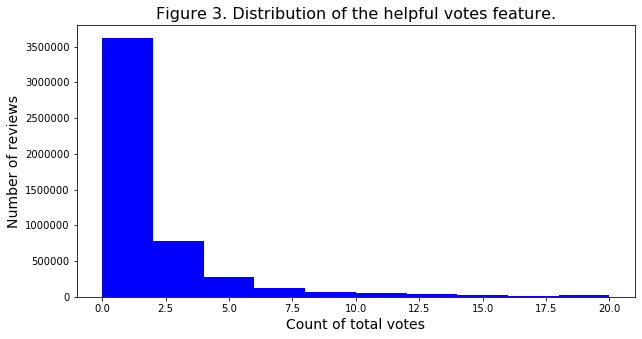

In [13]:
utils.total_votes_distplotter(df, f_num=3)

The total votes feature is just an aggregated version of the helpful votes feature and therefore exhibits an almost identical distribution behavior.

## V.IV Pearson Pairwise Correlational heatmap

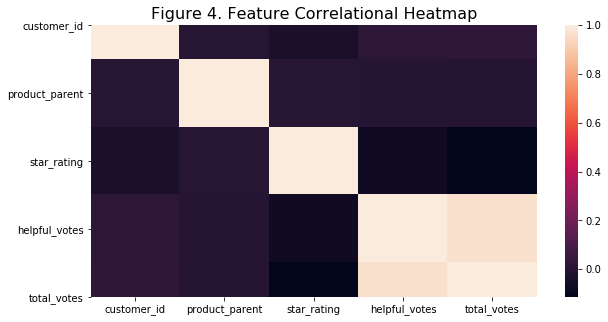

In [14]:
utils.pearson_heatmap(df, f_num=4)

Interestingly, there seems to be strong positive linear correlation helpful votes and total votes.

## V.V Distribution of Reviews per unit Time

<Figure size 720x360 with 0 Axes>

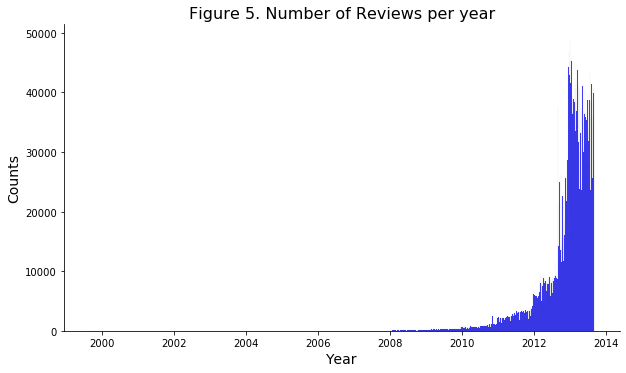

In [15]:
utils.plot_year_reviews(df, f_num=5)

The researchers intend to explore the distribution of review counts per year from the early 2000's upto 2014 to be able to discover where the data points are being concentrated at. Through this the research can be narrowed to a few years which contain the most number of review data points and from which insights can also be generated as to why this behavior has occured.

The dataset were from August 1999 - September 2013. From the figure above, it can be observed that number of customers purchasing E-books on Amazon was increasing abruptly starting in the year 2010. The number of reviews also started to increase in 2010. Moreover, the highest number of the reviews were in year 2013 and the highest number of reviews were on the month of January.

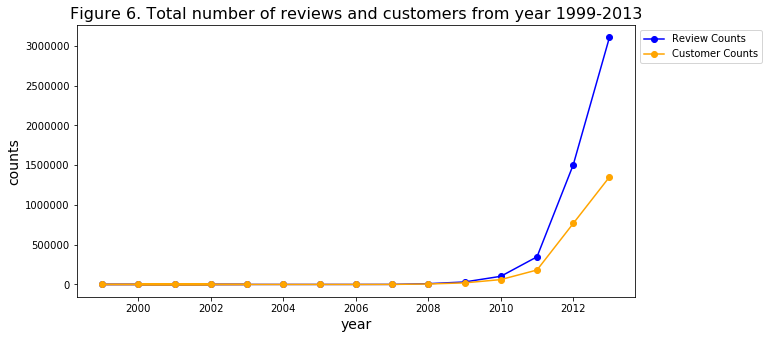

In [16]:
utils.year_customer_reviews(df, f_num=6)

The researchers found out that some customers have purchased multiple times and most probably also posted reviews multiple times. Therefore, there are more reviews than there are customers.

## V.V Data Summary

All in all, This set of data was processed, cleaned and explored to collect some useful insights to provide conclusion in accordance to our stated problems

- Null data point count: 216

- Total Number of Rows after processing: 5,100,209

- Most purchases came from the year 2013.

- There is a strong positive linear correlation helpful votes and total votes.

- Customers have purchased multiple times and most probably also posted reviews multiple times.


# VI. Results & Discussion

## VI.I What are the common features of the highly rated e-books?


### VI.I.a Review count in 2010-2013


In [17]:
df_limit = df[df['year'] >= 2010]

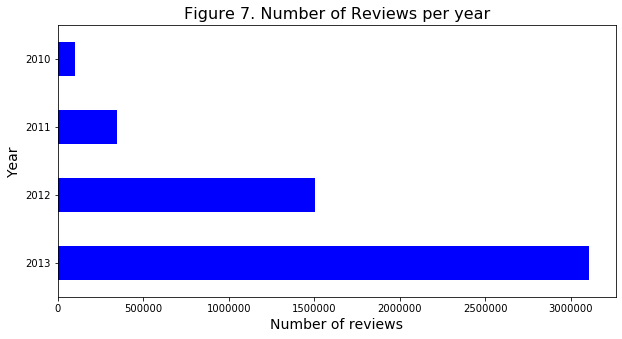

In [18]:
utils.bar_plot_year(df_limit, f_num=7)

2013 sales of ebooks has boosted significantly, this is probably due to the rampant releases of affordable and more powerful smartphones in the market around the globe. It was also in this year when the world's first 64 bit smartphone got released so the power of smartphone technology is starting to gain ground.[[5]](https://www.anandtech.com/show/7304/apple-announces-a7-worlds-first-64bit-smartphone-soc)

### VI.I.b Diving in 2010-2013

In this section the researchers intend to limit the EDA further to the years 2010-2013, This is due to the fact that the purchase of ebooks from Amazon only started to gain significant traction during 2010. A good reason for this is 2010 is the rise of the handheld smartphones that everyone is using nowadays, lower cost and relatively powerful to run apps like ebook readers.[[6]](https://newatlas.com/mobile-technology/smartphone-history-review-2010-2019/)

Below are the rankings of books based on review count which can be inferred also as purchase count since a customer cannot give a review if the customer did not first perform a purchase of the title. All books below are top-rated based on star ratings (all are 5-rated).

#### 2010

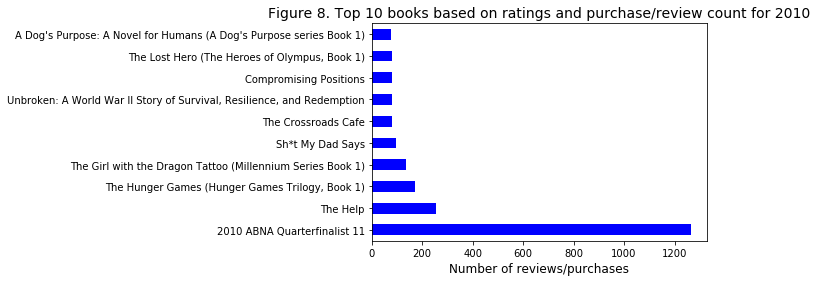

In [19]:
utils.grouper(df_limit, 2010, f_num=8)

The 2010 ABNA Quarterfinalist 11 are a set of books that have reached the highest round of the 2010 Amazon Breakthrough Novel Awards.[[7]](https://en.wikipedia.org/wiki/Amazon_Breakthrough_Novel_Award) This is not just a single book and that explains the bulk of purchases all being aggregated into a single bin. 

It makes more sense to analyze the next bins since these are single purchases of a book and we may be able to get more insights through choosing to analyze individual books that we can trace the titles of and their individual purchase count.

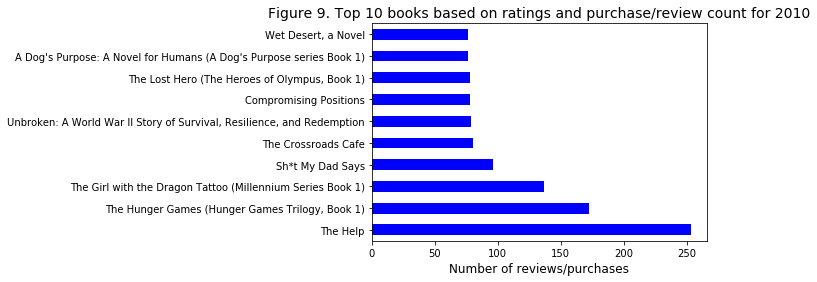

In [20]:
utils.grouper(df_limit, 2010, 9, True)

We can see here that the top 1 book by highest purchase count and by rating of 5 stars is a book called 'The Help'. The Help is a historical fiction novel by American author Kathryn Stockett and published by Penguin Books in 2009.[[8]](https://www.google.com/search?q=the+help+book&oq=the+help+book&aqs=chrome..69i57j46i512j0i512l8.5173j0j9&sourceid=chrome&ie=UTF-8) Due to popularity the 'The help' also received it's film adaptation in 2011.

'The help' is followed by the book 'The Hunger Games Book 1'. The Hunger Games is a 2008 dystopian novel by the American writer Suzanne Collins.[[9]](https://www.google.com/search?q=the+hunger+games+book+1&oq=the+hunger+games+book+1&aqs=chrome..69i57j46i512j0i512j0i20i263i512j0i512l6.4745j0j9&sourceid=chrome&ie=UTF-8). Due to popularity the book received it's film adaptation in 2012.

The third in this list is a book called 'The Girl with the Dragon Tattoo Book 1'. The Girl with the Dragon Tattoo is a psychological thriller novel by Swedish author and journalist Stieg Larsson, which was published posthumously in 2005 to become an international bestseller.[[10]](https://www.google.com/search?q=the+girl+with+the+dragon+tattoo+book+1&oq=the+girl+with+the+dragon+tattoo+book+1&aqs=chrome..69i57j0i22i30.12530j0j9&sourceid=chrome&ie=UTF-8) Due to popularity the book received it's film adaptation in 2011.

#### 2011

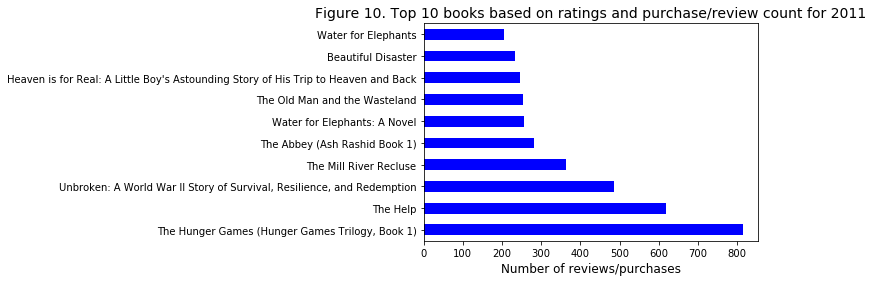

In [21]:
utils.grouper(df_limit, 2011, f_num=10)

'The Hunger Games Book 1' and 'The help' still occupies the first 2 spots, although, this time 'The Hunger Games' takes the number one spot. 

The third spot is now taken over by a book called 'Unbroken: A World War II Story of Survival, Resilience, and Redemption'. Unbroken: A World War II Story of Survival, Resilience, and Redemption is a 2010 non-fiction book by Laura Hillenbrand. [[11]](https://en.wikipedia.org/wiki/Unbroken:_A_World_War_II_Story_of_Survival,_Resilience,_and_Redemption). The book received a Film Adaptation in 2014 called 'Unbroken'.

#### 2012

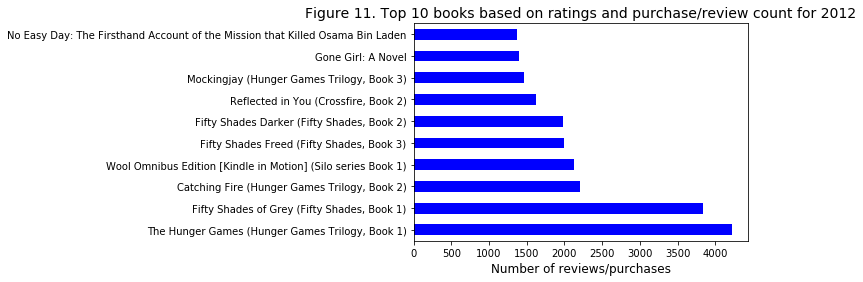

In [22]:
utils.grouper(df_limit, 2012, f_num=11)

'The Hunger Games Book 1' still holds the number one spot in amazon for 2012 based on purchase volume and ratings. This is probably also caused by the movie being released in 2012 and the marketing campaigns launched to promote the film. This causes a positive effect in the sales of the book as it gets tied with the film release.

The second spot is now taken by the book called 'Fifty Shades of Grey Book 1'. Fifty Shades of Grey is a 2011 erotic romance novel by British author E. L. James. It became the first instalment in the Fifty Shades novel series. [[12]](https://en.wikipedia.org/wiki/Fifty_Shades_of_Grey). The book received it's film adaptation 2015.

The third spot is taken by the book 'Catching Fire' which is the second book in the the Hunger Games franchise by the same Author. The book received it's film adaptation in 2013.

#### 2013

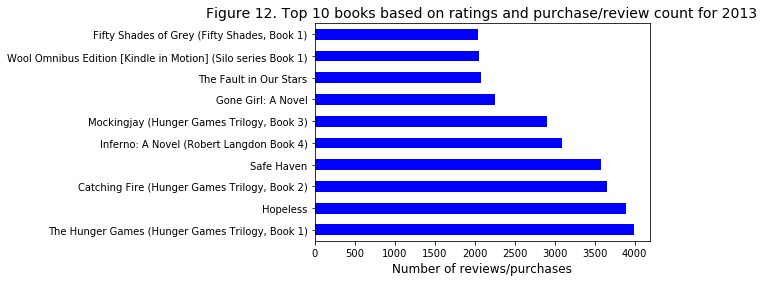

In [23]:
utils.grouper(df_limit, 2013, f_num=12)

'The Hunger Games Book 1' still holds the number one spot in amazon for 2013 based on purchase volume and ratings.

The second spot is now taken by a book called 'Hopeless'. Hopeless is a 2012 novel by Colleen Hoover. The book went against the pattern of having a film adaptation immediately after a couple of years. The reason as to why it did not receive a film adaptation is not very clear.

The third spot is still occupied by the book Catching Fire although it did not take the first place even when it's movie was released on this year. It could be that a lot of casual readers are still entering the franchise and deem it natural to start with the first book rather than jump ahead in on the second book.

### VI.I.c Section summary

It can be inferred that 2010-2013 is consistently dominated by books from Suzanne Collins. 2012 was dominated by the 50 shades of grey franchise written by E.L. James. The Researchers have also discovered that books that hit the top 10 have a very high chance of having a film adaptation, while, Books in the top 1-3 spots are almost always guaranteed a film adaptation with the exception of Hopeless in which based on research was a potential film but was never released as one due to unknown reasons. It can be further stated that books that reached the top 10 based on rating and sales/review counts are mostly fictional books when each title is researched. 


	Books from Suzanne Collins and E.L. James are the most popular in based on appearance on the list



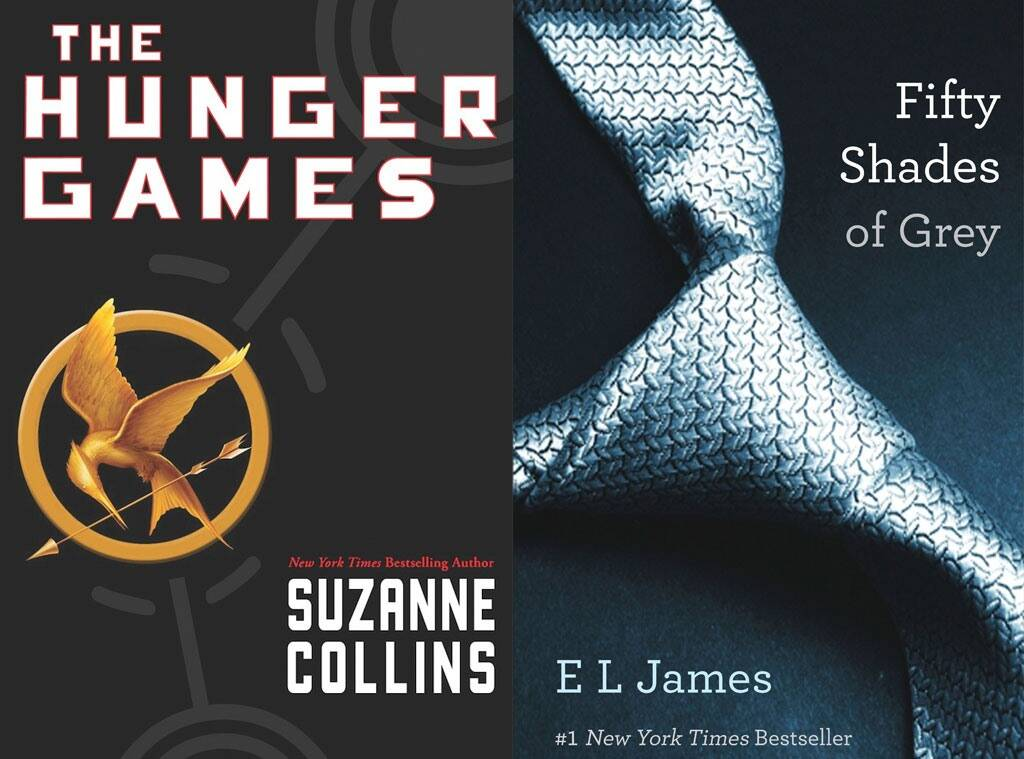

In [24]:
print('\n\tBooks from Suzanne Collins and E.L. James are the most popular in based on appearance on the list')
print()
display.Image("1024.bookcovers.mh.071912.jpg") 

## VI.II What are the common sentiments of customers on their purchases?

In [25]:
df1 = utils.get_sentiment_df(df, start_date='2013-01-01',
                  n=5000, target_col='review_headline')
del df

### VI.II.a Sentiments Analysis on Reviews Based on Star Rating

The researchers focused on the review headlines since most of the customers summarize their thoughts in the headline. The second reason is the running time. Review headlines are usually short compared to review body. This will save much of computation power and time.

After removing special characters and stopwords, the texts were converted to its root or base form. Finally, reviews were divided into 3 sentiments: positive, negative and neutral. Positive sentiments are reviews that got 4 and 5 star ratings. Neutral sentiments are reviews with 3 stars. On the otherhand, negative sentiments are reviews with star ratings 1-2.

Figure 13 shows the distribution of the positive, negative and neutral sentiments in our data.

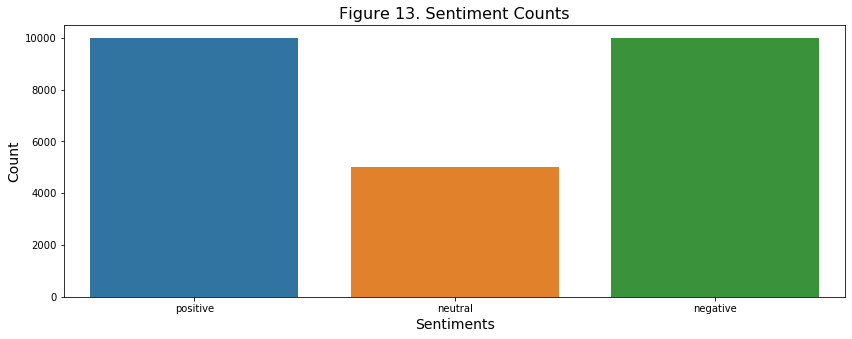

In [26]:
utils.plot_sentiments_count(df1, f_num=13)

In the dataset, positive and negative sentiments are twice as many as the neutral sentiment. Frequent words used by customers for each of the three sentiments will be discussed in the next section.

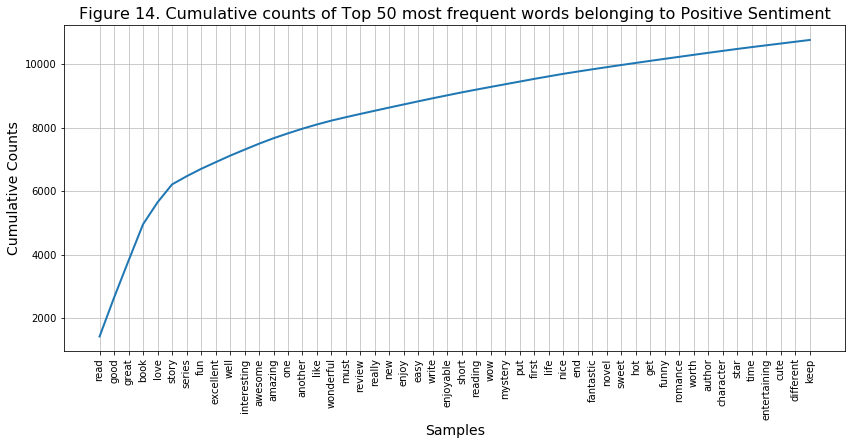

In [27]:
utils.plot_freq_words(df1, 'Positive', f_num=14)

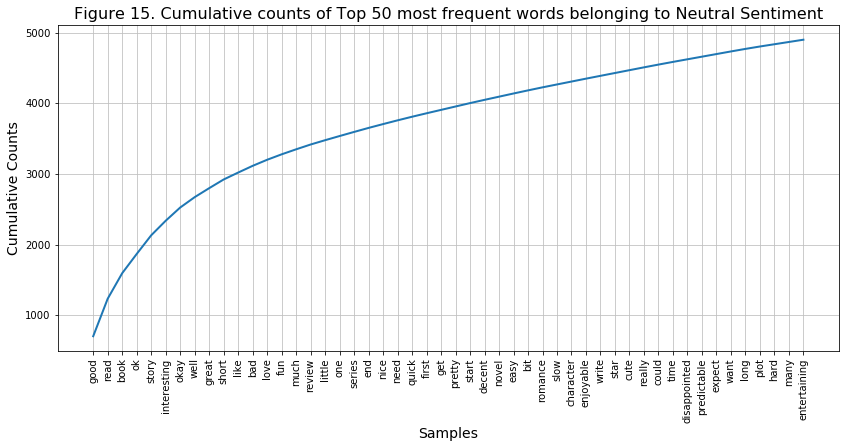

In [28]:
utils.plot_freq_words(df1, 'Neutral', f_num=15)

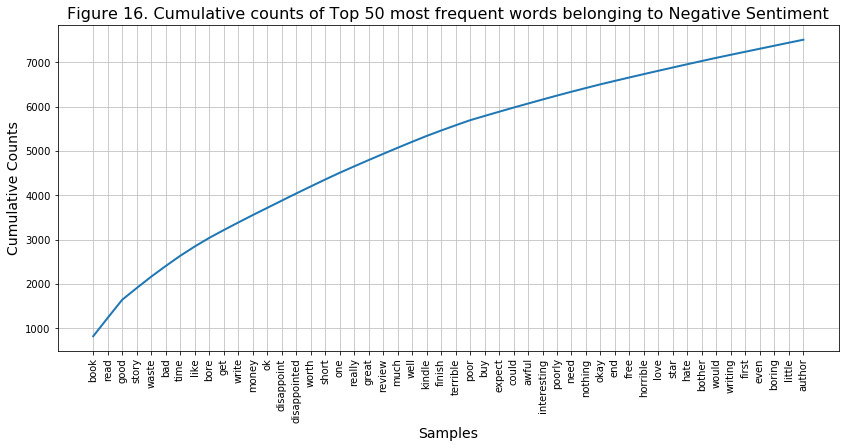

In [29]:
utils.plot_freq_words(df1, 'Negative', f_num=16)

Figures 14-16 shows the top 50 most common words and the cumulative counts of the terms in the document.
Figure 14 shows the cumulative counts for the top 50 most frequent words which is on the document with positive sentiments. Frequent words include read, good, great, wonderful, excellent, etc.
Moreover, Figure 15 and 16 show the cumulative counts of the Top 50 frequent words which is on the document with neutral and negative sentiments, respectively. Words regarded as neutral are good, okay, interesting, like, read, etc. However, words regarded as negative include read, good, waste, bad, like, bore, etc.


It is easier to show the frequent words for each sentiment using wordcloud. Wordcloud as the name suggests is a cloud of words.  It is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. Figures 17-19 show the wordcloud for positive, neutral and negative sentiments, respectively.

**Positive Review Cloud**

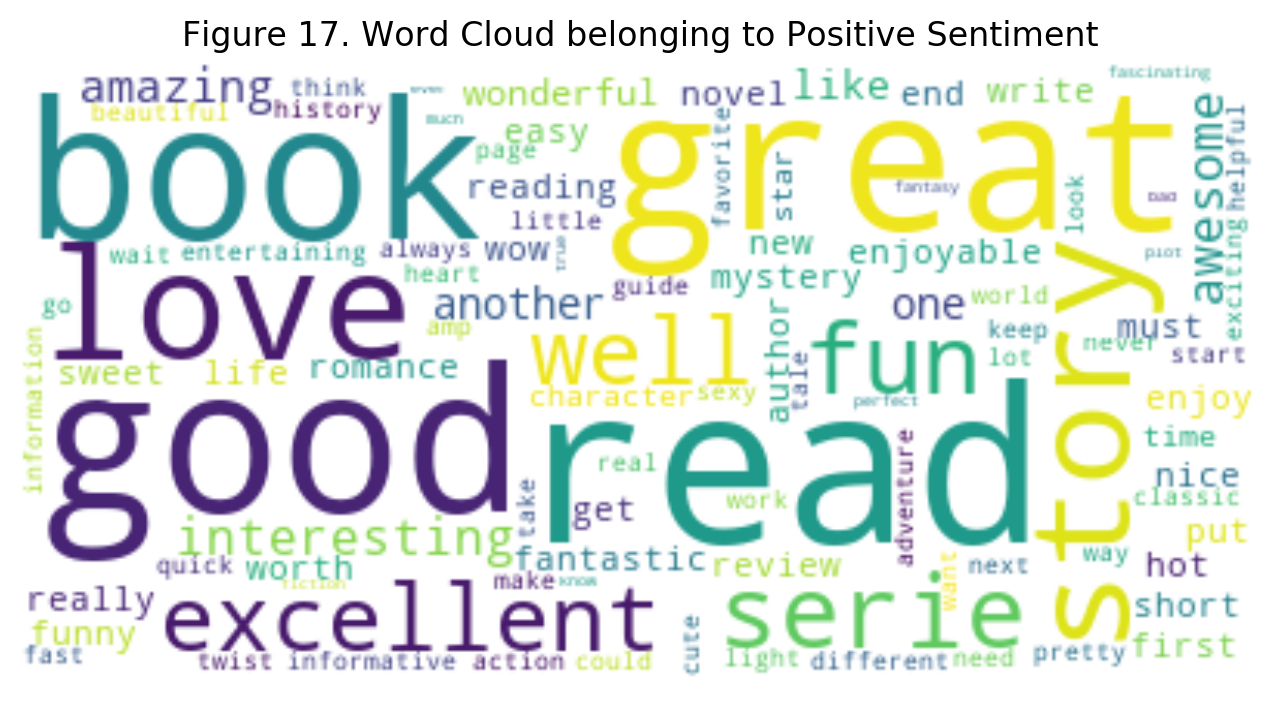

In [30]:
utils.word_cloud(df1, 'Positive', f_num=17)

**Neutral Review Cloud**

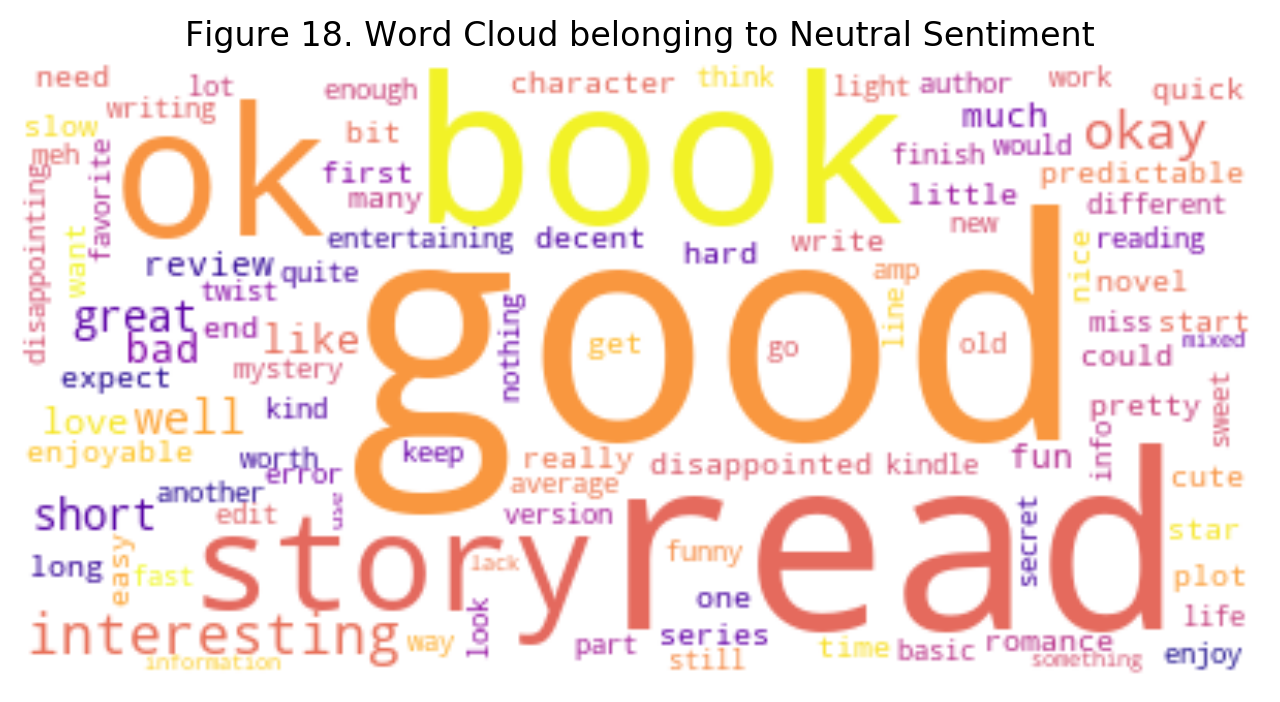

In [31]:
utils.word_cloud(df1, 'Neutral', f_num=18)

**Negative Review Cloud**

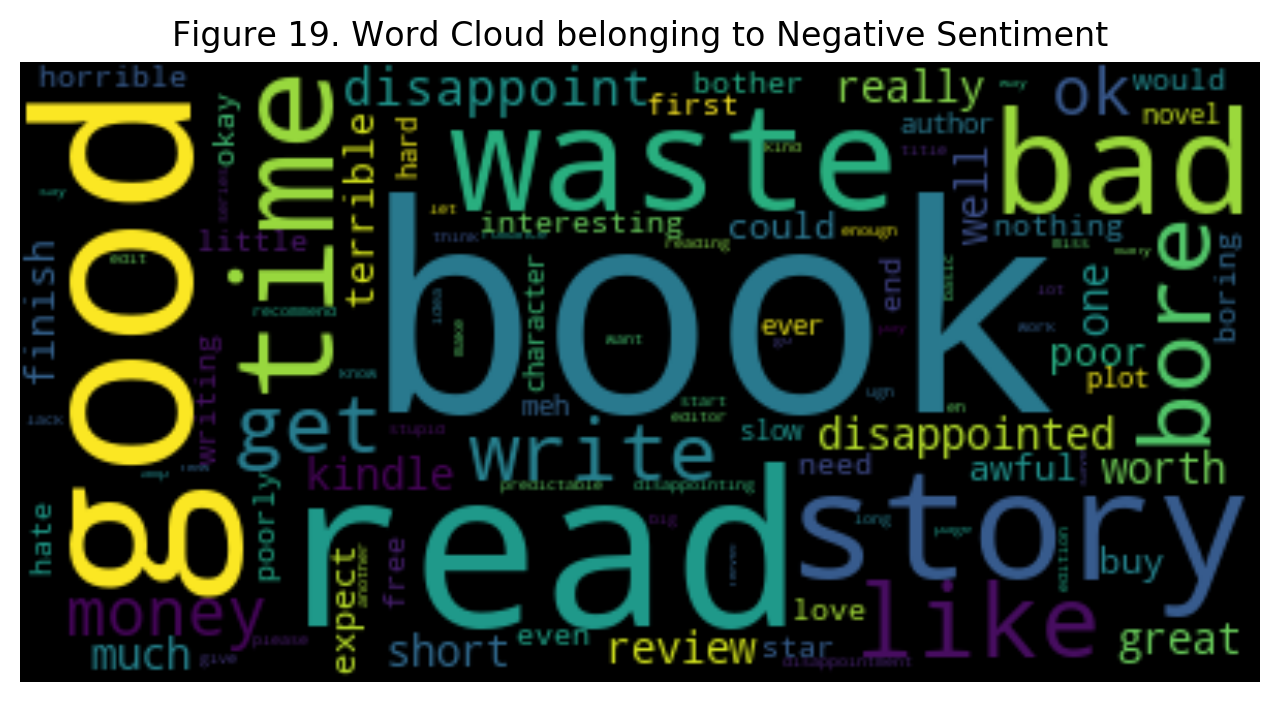

In [32]:
utils.word_cloud(df1, 'Negative', f_num=19)

Using the star ratings of the reviews to divide the documents into 3 e.g.(positive (4-5 stars), negative (1-2 stars), and neutral (3 stars) show that:
1. Customers loved e-books with excellent, great, or good stories. *Awesome, fun, new, twist, funny, romance, mystery, exciting* are also frequently used. Customers like e-books with funny, mysterious and romantic plot or content.
2. Customers who had neutral sentiments on their purchase usually described their e-books with *good, predictable, short* and *interesting*. Well written series, novels or stories may interest customers but also predictable plot may bore them, which may conclude why they had neutral sentiments on the e-book. Interestingly, there were also customers who mentioned *bad* on their purchase. 

3. Customers who gave 1-2 stars on the reviews also find their purchases as waste of money. E-books with *boring, slow and poorly written* content or plot are dissapointing to readers. Words *terrible, horrible, awful* and *bad* are also captured in the negative wordcloud. However, the word *good* may be misleading as shown in Figure 19. Since the stop words like *not* and *no* are removed in the cleaning process, the phrase *not good* may be captured as *good*.

### VI.II.b Sentiments Analysis using AFINN

In this section, AFINN is used to analyze sentiments on the document. Previously, some words appeared to be positive were part of the negative sentiments wordcloud which could mislead readers. For instance, the word *good* is one of important words in the Negative sentiment wordcloud (refer to Figure 19). The researchers would attempt to compare the most important words for positive, negative, and neutral sentiments using Afinn.

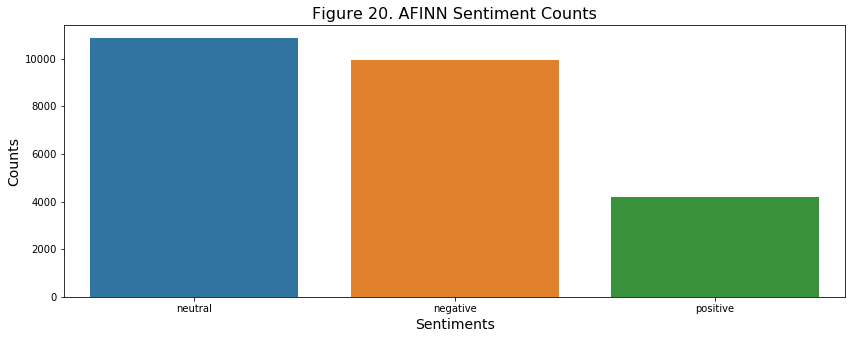

In [33]:
df1 = utils.get_afinn_score(df1, plot=True, f_num=20)

**Positive Review Cloud Using AFINN Sentiment Analysis**

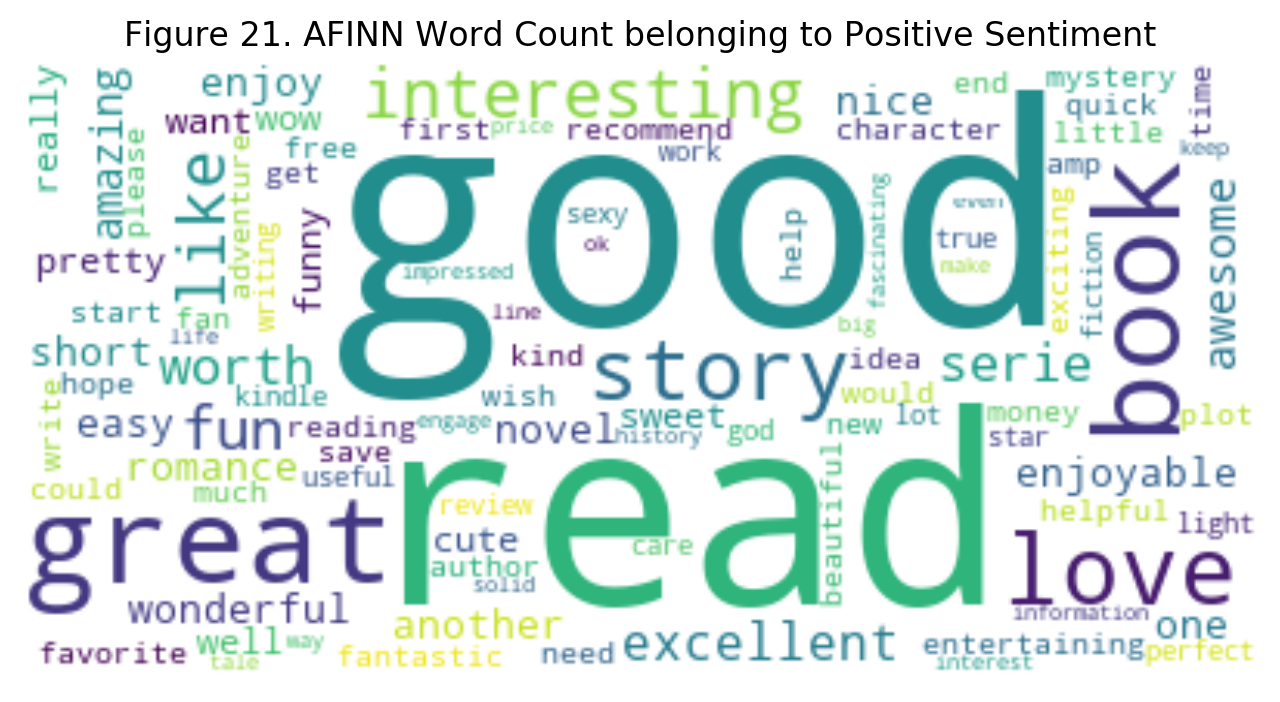

In [34]:
utils.word_cloud(df1, 'Positive',afinn=True, f_num=21)

**Neutral Review Cloud Using AFINN Sentiment Analysis**

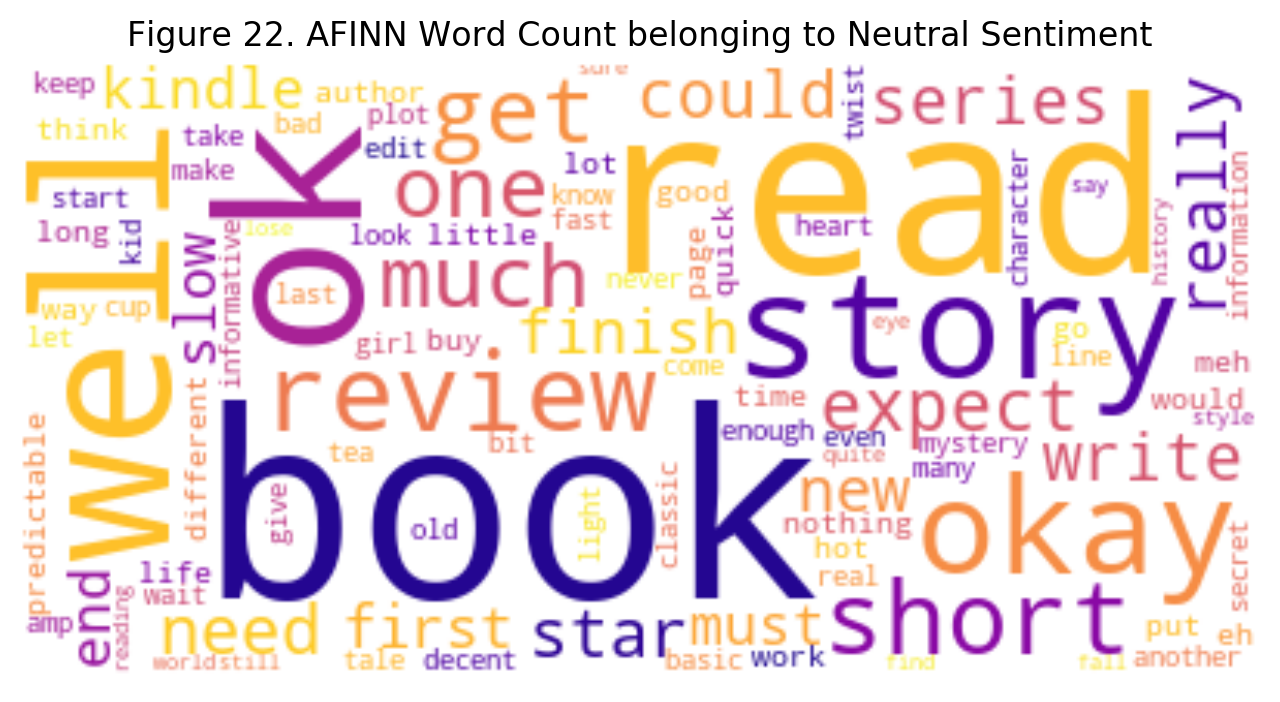

In [35]:
utils.word_cloud(df1, 'Neutral', afinn=True, f_num=22)

**Negative Review Cloud Using AFINN Sentiment Analysis**

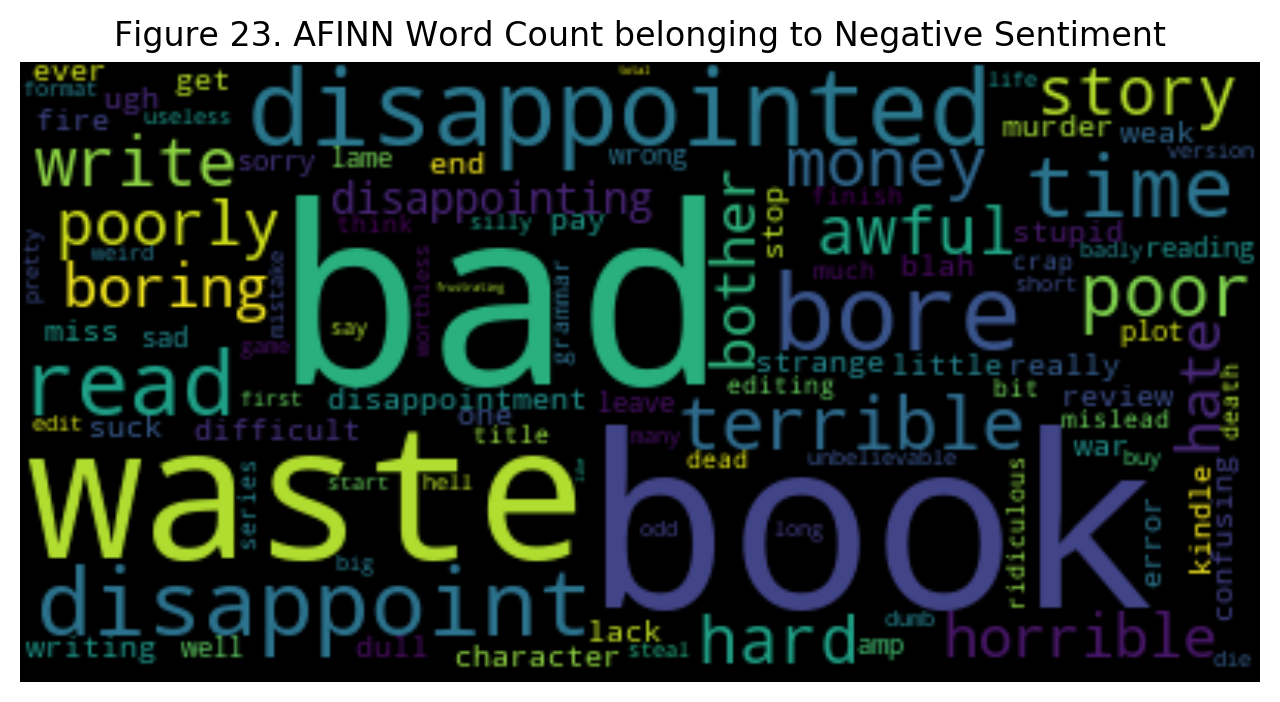

In [36]:
utils.word_cloud(df1, 'Negative', afinn=True, f_num=23)

Using AFINN, here are the insights the researchers obtained:

1. Words *good, great, love, interesting* and *read* are the most common sentiments that are captured in the analysis. The customers were happy with their e-books if the contents were interesting, enjoyable, and entertaining. The words *wow, mystery, romance, adventure, characters* and *funny* were also captured. It seems that readers found e-books with romance and mystery genre enjoyable to read. 

2. Words *read, book, okay, ok, informative, quite, predictable* and *well* are common sentiments that are considered neutral. It seems like e-books that are *quite* informative and predictable did not give exceptional nor dislike emotions to readers.

3. Words *bad, disappoint, disappointed, bore, waste,* and *terrible* are the common sentiments in the Negative wordcloud. Readers were disappointed with boring and poorly written stories. Words *confusing, lame, end,* and *dull* are also captured. It seems that readers were not satisfied with stories with dull, confusing or lame ending.

## VI.III What are the topics or issues usually mentioned in the reviews?

In this section, the researchers attempted to do topic modeling using LSA, as applied to customers' reviews, to show their benefits practically in detecting important topics or issues. Insights obtained in the analysis could help book authors/publishers to further improve their products.

### VI.III.a LSA Topic Modeling

The tf-idf scores are shown below for each term (column) in the overall documents (row).

In [37]:
tfidf, df2, feature_names = utils.get_matrix_tfidf(df1)
df2.head()

absolutely  action  adventure  advice  age  almost  alright  always  \
0         0.0     0.0        0.0     0.0  0.0     0.0      0.0     0.0   
1         0.0     0.0        0.0     0.0  0.0     0.0      0.0     0.0   
2         0.0     0.0        0.0     0.0  0.0     0.0      0.0     0.0   
3         0.0     0.0        0.0     0.0  0.0     0.0      0.0     0.0   
4         0.0     0.0        0.0     0.0  0.0     0.0      0.0     0.0   

   amazing  amazon  ...  would  wow  write  writer  writing  wrong  year  yet  \
0      0.0     0.0  ...    0.0  0.0    0.0     0.0      0.0    0.0   0.0  0.0   
1      0.0     0.0  ...    0.0  0.0    0.0     0.0      0.0    0.0   0.0  0.0   
2      0.0     0.0  ...    0.0  0.0    0.0     0.0      0.0    0.0   0.0  0.0   
3      0.0     0.0  ...    0.0  0.0    0.0     0.0      0.0    0.0   0.0  0.0   
4      0.0     0.0  ...    0.0  0.0    0.0     0.0      0.0    0.0   0.0  0.0   

   young  zombie  
0    0.0     0.0  
1    0.0     0.0  
2    0.0     0.0  
3    0.0     0.0  
4    0.0     0.0  

[5 rows x 430 columns]

131


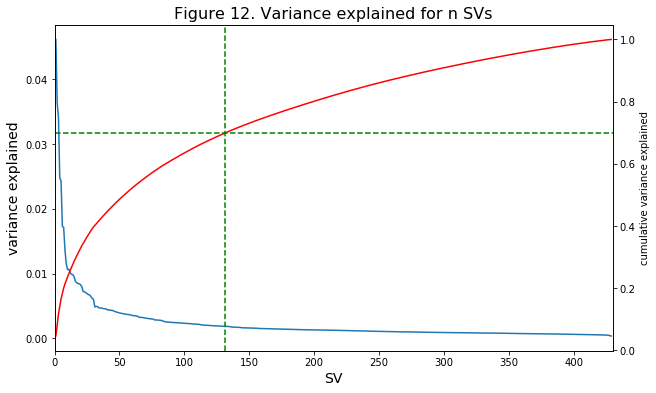

In [38]:
k, lsa, doc_topic= utils.plot_variance_per_n(tfidf= tfidf, n_components=429,
                        threshold_variance=0.70, plot=True, f_num=12)
print(k)

The reason SVD is useful, is that it finds a reduced dimensional representation of the matrix that emphasizes on the strong relationships and removes the noise. In other words, it makes the best possible reconstruction of the matrix with the least possible information. The trick in using SVD is in figuring out how many dimensions(concepts) to use when approximating the matrix.

Figure 12 shows the variance explained per number of singular values (SVs) used in the model. To retain 70% of the information from the data, the researcher would need to retain 131 singular vectors as shown in the green perpendicular lines. The researchers decided to keep only 131 dimensions in the analysis.

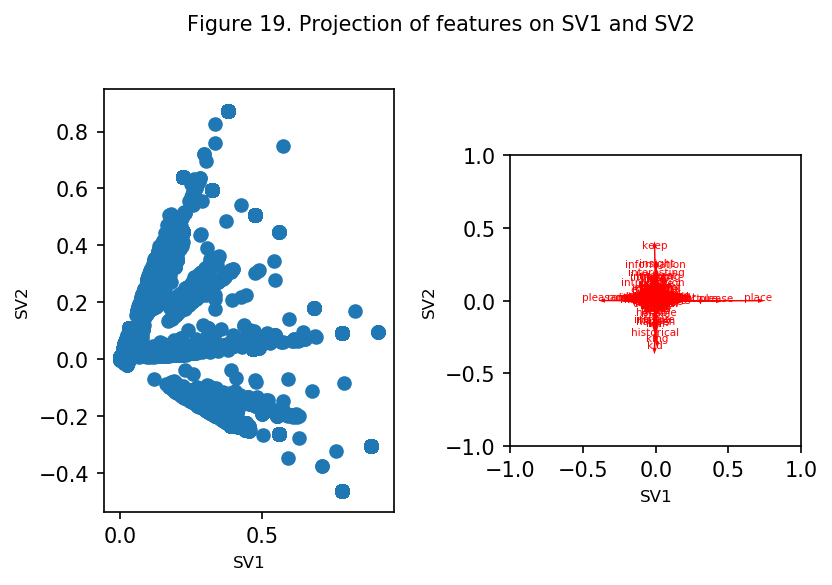

In [39]:
Vt = utils.plot_SV_vs_features(doc_topic, tfidf, lsa, feature_names, f_num=19)

Figure 19 shows the projected features on the SV1 and SV2. There's a lot of features and it's difficult to read the labels and arrows. The researchers decided to look on the weights for the top 10 features with highest weight for the top 6 singular vectors. This is shown in Figure 20.

**Feature Correlation with SVs**

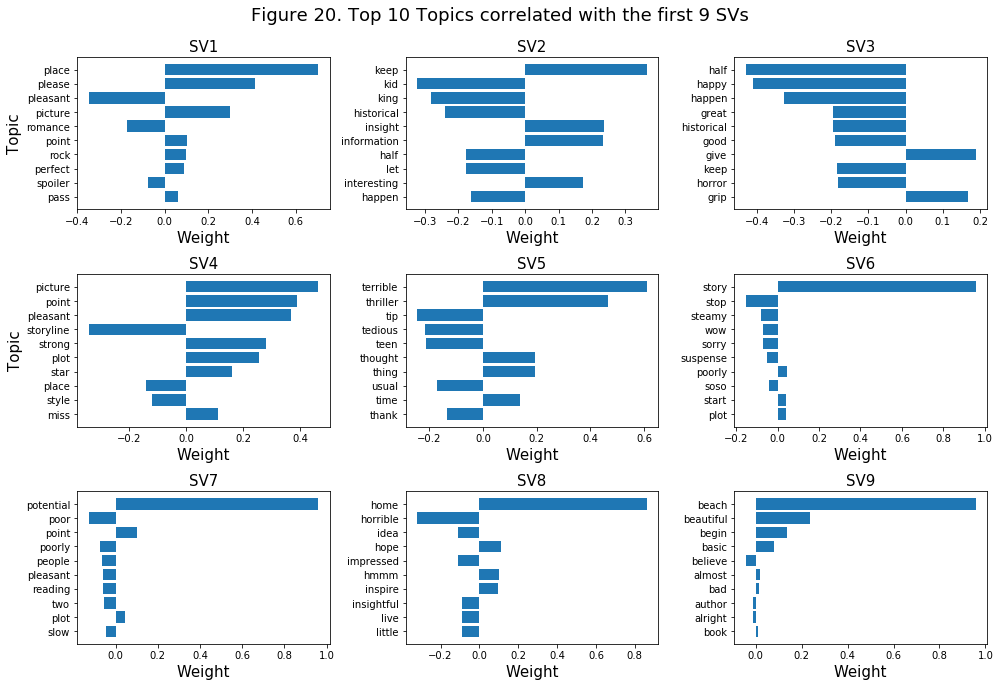

In [40]:
utils.plot_topics(Vt,feature_names, f_num=20)

For the first singular vector SV1, the terms *place, please, picture, point, rock, perfect and pass* are positively correlated with the SV1. For SV2, there is a strong but negative correlation with the feature *kid, king, historical and usual*. For SV6, it seems that feature *story* has the highest correlation. On the otherhand, *beach, beautiful, begin, basic* are strongly correlated with SV9.

Lastly, the first 20 topics are displayed below.

In [41]:
utils.display_topics(lsa, feature_names, 10, topic_names=None, n_topic=20)


Topic  0
good, read, book, great, story, love, fun, pretty, series, one

Topic  1
great, book, love, story, read, series, ok, another, like, review

Topic  2
read, great, fun, easy, must, quick, interesting, worth, enjoyable, excellent

Topic  3
love, read, book, fun, ok, interesting, easy, must, excellent, worth

Topic  4
love, great, story, good, short, series, line, pretty, another, start

Topic  5
story, ok, interesting, short, book, read, like, fun, well, line

Topic  6
ok, great, good, love, series, start, pretty, nothing, information, work

Topic  7
interesting, great, good, ok, love, concept, idea, reading, series, plot

Topic  8
okay, interesting, great, good, plot, nothing, love, series, expect, start

Topic  9
like, bad, really, well, write, series, okay, one, want, time

Topic  10
bad, ever, well, time, series, waste, one, review, write, get

Topic  11
review, well, time, write, waste, series, money, worth, one, kindle

Topic  12
well, write, time, waste, worth, money, one

Topics 0-4, 7 and 19 seem to indicate documents with good reviews. Topic 15 seems to cluster documents with boring, long, and predictable stories which disappoint readers. Topics 16 and 18 have clustered words with mixed of negative and positive sentiments. Topic 17 seems to cluster documents with fun and awesome series or content. Since the goal is to look for the topics or issues usually mentioned in the reviews, the findings suggest that interesting, enjoyable and fun contents always satisfied readers. Boring and predictable stories seem to correlate with waste of money and disappointment from readers. The researchers believed there is not so much insights gathered from the Topic clusters.

As observed, LSA is quick and efficient to use, but it does have a few primary drawbacks: lack of interpretable embeddings. There is no clear insights on what the topics are, and the components may be arbitrarily positive or negative. The topics generated seem to be inefficient representation of the topics within the text data.

# VII. Conclusion

The researchers have discovered that the years 2010-2013 are where sales of E-books started to increase rapidly. The rise of smartphone usage and the appearance of 64-bit powered phones have started to appear in 2013 thus explaining the high amount of sales in 2013. The researchers have also found out that the Author **Suzanne Collins** has consistently topped the charts in 2011 to 2013 while still being in the top 10 in 2010. The year 2012 has seen a spike in sales of books from the Author **E.L. James**. 

It can be inferred that books that have entered the top 10 have a higher probability of receiving a film adaptaion in a couple years after they reach the Amazon top list. However, books that have reached the number one spot based on ratings and number of purchases are almost automatically given a film adaptation. It seems that when the researchers scrutinize the top charts based on EDA the books that consistently reach the top 10 are **fictional books** with the occasional mix of non-fiction books but it can be observed that the chart is consistently topped by a fictional book. 

The researchers have also been able to find common words that resonate with positive, negative and neutral sentiments. AFINN, a sentiment lexicon, is better in identifying sentiments on text reviews. The researchers inferred that customers loved stories when the contents are interesting, unpredictable, enjoyable, and entertaining. Contents with romance and mystery also correlate with positive sentiments from readers.

LSA is easy to implement and faster compared to other available algorithms because it involves document term matrix decomposition only. However, the topics obtained using LSA model in section VI were not efficient representation of the topics within the text data. This type of model has limitations. For instance, latent topic dimension depends upon the rank of the matrix and it can't extend to that limit. 

# VIII. Recommendation

1. **What makes a book sell?**

    Fictional books seem to take the spotlight when it comes to Amazon E-book sales, there are occasional mix-ins of non-fictional books although based on EDA the top chart is always filled by a Fictional Title a famous example is the book series by Suzanne Collins called the `The Hunger Games`. The researchers recommend that authors yearning to make good sales figures on their literary work to focus on writing Fictional type books.


2. **Turn books to movies**

    Books that reach the top 10 best sellers based on rating and number of sales are able to get a higher probability of getting a film adaptation. Reaching the top 3 increases the chances and topping the chart almost guarantees a sure contract for a film adaptation. This can be observed with titles like `The Hunger games series`, `50 shades of grey series` or even non-fictional titles like `Unbroken`. The researchers recommend that authors who are aiming to get a film adaptation first make a book that can reach the top 10 chart for ratings and sales figures to be able to gain a higher chance of getting a film adaptation.


3. **E-books still not taking the center stage**

    Based on research, E-books are still not taking the center stage of consummable text media. 72% of adults in the United States are still sticking to traditional printed media.[[3]](https://www.tonerbuzz.com/blog/paper-books-vs-ebooks-statistics/) The researchers highly recommend authors to produce two versions of their literary work, one in print and one in E-book format. This way, the book will still be able to hit both markets and maximize profits. In the United States Print media may prevail over electronic media, but it can be speculated that countries that don't have direct shipping may prefer to download E-books instead therefore this market is still covered by producing a digital version.


4. **Stories with clear, unexpected, and exciting plots are correlated with positive sentiments**
    
    When plots have twist and unexpected clear endings, they tend to form the lasting memories for readers. The study confirmed that readers get bored with predictable plot and may dislike books with confusing and boring endings. The researchers recommend that authors and story makers who are still starting in their careers to craft narratives with twists and exciting climax that will make readers engaged in the story.
    

5. **Explore other topic modeling techniques likes Non-negative Matrix factorization (NMF) and Latent Dirichlet Allocation**

    This study worked on topic modeling focused on the algorithm employing Latent Semantic Analysis (LSA). The advantages of LSA (over the NMF and LDA) are fast and easy to implement. However, it doesn't consider the relationship between documents in the corpus, while LDA does. The researchers recommend to improve the model for next studies by finding the optimal number of topics for the LSA model by using coherence score and other performance metrics. Moreover, many studies show that LDA and NMF give a better result than LSA. The researchers also recommend to explore other techniques like NMF and LDA that may give better insights on the text reviews dataset.

## IX. References

[1] Wikipedia contributors. (2021, August 24). Ebook. Wikipedia. https://en.wikipedia.org/wiki/Ebook

[2] e-book | Definition, History, & Facts. (n.d.). Encyclopedia Britannica. Retrieved August 26, 2021, from https://www.britannica.com/technology/e-book

[3] Paper Books vs eBooks Statistics, Trends and Facts [2021]. (n.d.). Toner Buzz. Retrieved August 26, 2021, from https://www.tonerbuzz.com/blog/paper-books-vs-ebooks-statistics/

[4] Somers, J. (2021, April 22). 40 of Our All-Time Favorite Book-to-Movie Adaptations. Https://Www.Bookbub.Com/Blog/Best-Movies-Based-on-Books-All-Time. https://www.bookbub.com/blog/best-movies-based-on-books-all-time

[5] Shimpi, A. L. (2013, September 10). Apple Announces A7, World's First 64-bit Smartphone SoC. AnandTech. https://www.anandtech.com/show/7304/apple-announces-a7-worlds-first-64bit-smartphone-soc

[6] New Atlas. (2019, December 16). The rise of the smartphone: Mobile technology in the 2010s. https://newatlas.com/mobile-technology/smartphone-history-review-2010-2019/

[7] Wikipedia contributors. (2021a, June 1). Amazon Breakthrough Novel Award. Wikipedia. https://en.wikipedia.org/wiki/Amazon_Breakthrough_Novel_Award

[8] the help book - Google zoeken. (n.d.). Google. Retrieved August 26, 2021, from https://www.google.com/search?q=the+help+book&oq=the+help+book&aqs=chrome..69i57j46i512j0i512l8.5173j0j9&sourceid=chrome&ie=UTF-8

[9] the hunger games book 1 - Google zoeken. (n.d.). Google. Retrieved August 26, 2021, from https://www.google.com/search?q=the+hunger+games+book+1&oq=the+hunger+games+book+1&aqs=chrome..69i57j46i512j0i512j0i20i263i512j0i512l6.4745j0j9&sourceid=chrome&ie=UTF-8

[10] the girl with the dragon tattoo book 1 - Google zoeken. (n.d.). Google. Retrieved August 26, 2021, from https://www.google.com/search?q=the+girl+with+the+dragon+tattoo+book+1&oq=the+girl+with+the+dragon+tattoo+book+1&aqs=chrome..69i57j0i22i30.12530j0j9&sourceid=chrome&ie=UTF-8

[11] Wikipedia contributors. (2021a, April 29). Unbroken: A World War II Story of Survival, Resilience, and Redemption. Wikipedia. https://en.wikipedia.org/wiki/Unbroken:_A_World_War_II_Story_of_Survival,_Resilience,_and_Redemption 

[12] Wikipedia contributors. (2021c, August 7). Fifty Shades of Grey. Wikipedia. https://en.wikipedia.org/wiki/Fifty_Shades_of_Grey

[13] Wikipedia contributors. (2021, August 10). Sentiment analysis. Wikipedia. https://en.wikipedia.org/wiki/Sentiment_analysis

[14] Python LSI/LSA (Latent Semantic Indexing/Analysis). (n.d.). DataCamp Community. Retrieved August 27, 2021, from https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python